# An introduction to Artificial Neural Networks
Maciej Aleksandrowicz, MVG Group 2022, Machine Learning Laboratory, Version 1

## Part 1: Universal Aproximators
Artifical Neural Networks (ANN) can be seen as a functions aproximators, optimized on provided data. 

### Artificial Neuron Model

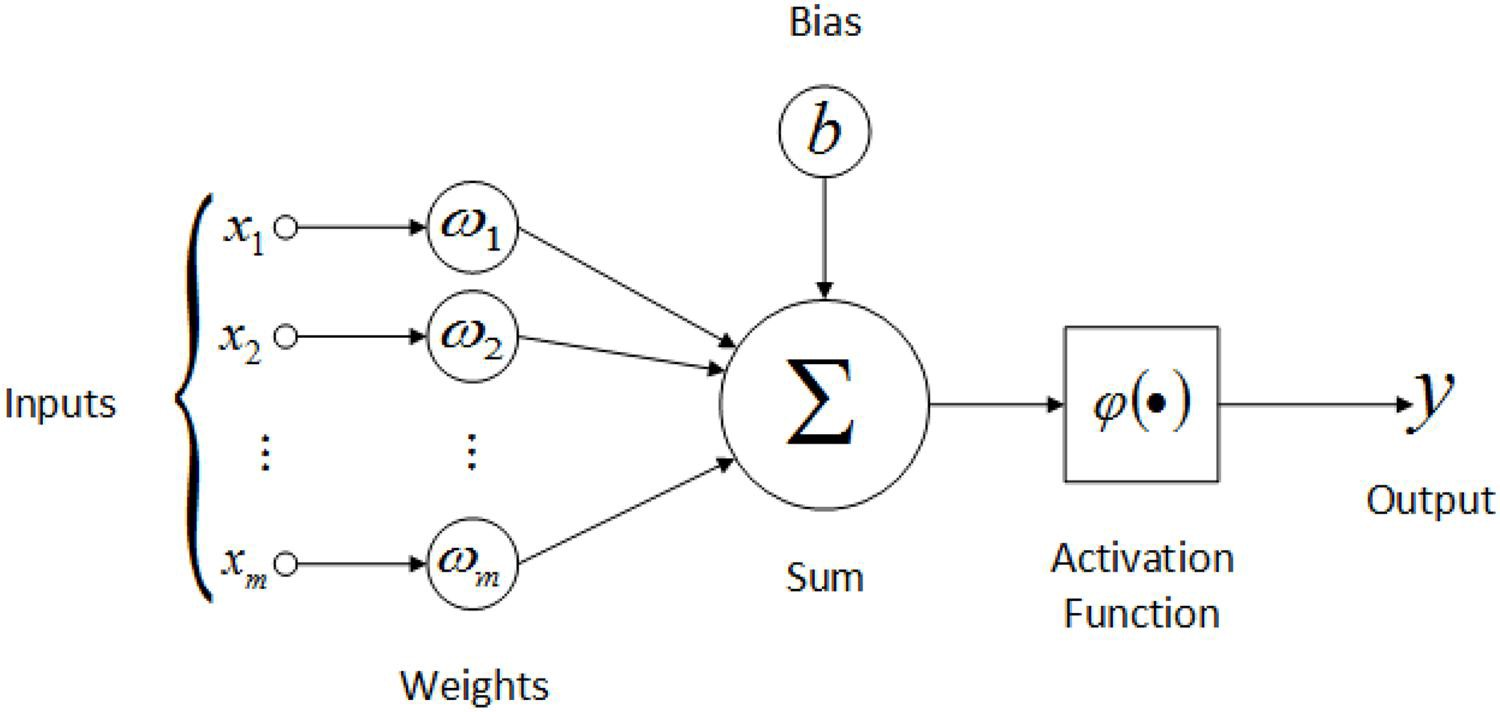

### Example activation functions

### Matrix representation

In [279]:
import matplotlib.pyplot as plt
import numpy as np

def ReLU(x):
    return np.maximum(0, x)

input_size = 2
neuron_units = 10

x = np.random.randn(input_size, 1)
weights = np.random.randn(neuron_units, input_size)
biases = np.random.randn(neuron_units, 1)

# Forward propagation
activation = np.dot(weights, x) + biases
y = ReLU(activation)

print(y)

[[0.        ]
 [0.        ]
 [0.        ]
 [1.548424  ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.08123115]
 [0.        ]
 [0.        ]]


## Part 2: Basic implementation
In the following sections we will depend mainly on Numpy package

In [280]:
%pip install numpy
import numpy as np

Note: you may need to restart the kernel to use updated packages.


### Task 2.1
Implement an artificial neuron class, with **sigmoid** activation function. Use matrix operations (from Numpy package). Rememebr to define the activation function derivative. You can use following class-template or implement whole class by yourself.


In [281]:
from typing import Callable,Tuple

def activation_function(x: float):
    return 1 / (1 + np.e**-x)


def activation_function_deriv(x: float):
    return activation_function(x) * (1 - activation_function(x))

In [282]:
w = np.random.randn(1,5)
print("w:", w)
X = np.array([1,2,3,4,5])
X.resize((5,1))
print("X:", X)
b = 0.9
sum_ = np.dot(w, X) + b
print("sum_:", sum_)
act = activation_function(sum_)
print("act:", act)
dfdx = activation_function_deriv(X)
print("dfdx:", dfdx)
del_y = 0.5
delta = w.T*dfdx*del_y
print("delta:", delta)
alpha = 0.1
inp = 3
wn = w - alpha * X.T * del_y
print("wn:", wn)
wb = b - alpha * del_y
print("wb:", wb)



w: [[-0.14072284  0.30170323  1.77780076  0.99172615  0.71539853]]
X: [[1]
 [2]
 [3]
 [4]
 [5]]
sum_: [[14.23998317]]
act: [[0.99999935]]
dfdx: [[0.19661193]
 [0.10499359]
 [0.04517666]
 [0.01766271]
 [0.00664806]]
delta: [[-0.01383389]
 [ 0.01583845]
 [ 0.04015755]
 [ 0.00875828]
 [ 0.002378  ]]
wn: [[-0.19072284  0.20170323  1.62780076  0.79172615  0.46539853]]
wb: 0.85


In [283]:
from typing import List
class Neuron:
    def __init__(self,
                 input_size: int,
                 gener_init_weights_val_func: Callable = np.random.randn,
                 act_func: Callable = activation_function,
                 act_func_deriv: Callable = activation_function_deriv,
                 ):
        self._weights = None
        self._inp_size = input_size
        self._bias = None
        self._init_weights_and_bias(input_size, gener_init_weights_val_func)
        self._activation_function = act_func
        self._activation_function_deriv = act_func_deriv
        self.y = None
        self.x = None

    def __call__(self, x):
        return self._forward_propagation(x)

    def backwards_propagation(self, delta, alpha=1):
        self._update_weights_and_bias(delta, alpha)
        self._calc_deltas(delta)
        return self.deltas_out


    def _forward_propagation(self, x):
        self.x = self._process_input(x)
        sum_ = np.dot(self._weights, self.x) + self._bias
        self.y = self._activation_function(sum_)[0]
        return self.y

    def _process_input(self, x: np.array or List or Tuple):
        if isinstance(x, (list,tuple)):
            assert len(x) == self._inp_size
            x = np.array(x)
        return x.reshape((self._inp_size, 1))


    def _init_weights_and_bias(self, input_size: int, gener_func):
        self._weights = gener_func((1, input_size))
        self._bias = gener_func(1)

    def _calc_deltas(self, delta):
        self.deltas_out = self._weights.T * activation_function_deriv(self.x) * delta

    def _update_weights_and_bias(self, delta, alpha: float = 0):
        self._weights -= alpha * self.x.T * delta
        self._bias -= alpha*delta

## Part 3: Artificial Neuron as binary clasifier
A single neuron used as binary classifier is also known as *perceptron*, frequently used as building block for *dense* layer. It can be used for logistic regression.

### Task 3.1
1) Using your Neuron class construct a following ANN:
    * Input size: 2
    * 1 layer with 1 unit with any activation function
    * Output size: 1

2) Perform separate trainings on provided datasets of truth tables of logic gates.
3) Visualize each dataset and ANN's result (a regression line, as function of two inputs).
4) Comment results


#### OR gate

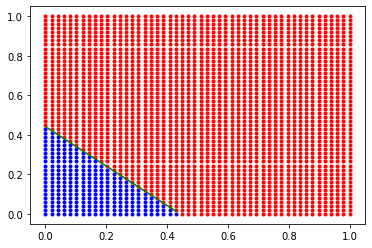

In [284]:
from matplotlib import pyplot as plt
def do_gate(set_x, set_y):
    neuron = Neuron(2,np.ones)
    for i in range(200):
        for X,Y in zip(set_x, set_y):
            X = np.array(X).T
            y = neuron(X)
            cost = y-Y
            neuron.backwards_propagation(cost)
    xs = np.linspace(0,1,50)
    plt.figure()
    for x0 in xs:
        for x1 in xs:
            x = np.array([x0,x1]).T
            res = neuron(x)
            col = 'r' if res>0.5 else 'b'
            plt.plot(x0,x1,f"{col}.")

    a = neuron._weights[0][0]
    b = neuron._weights[0][1]
    c = neuron._bias[0]
    pa = -a/b
    pb = -c/b
    ys = []
    xs2 = []
    for x in xs:
        y = pa*x+pb
        if y > 0 and y < 1:
            xs2.append(x)
            ys.append(y)

    plt.plot(xs2,ys,'g-')

    plt.show()
    return neuron

dataset_or_x = ((0,0), (0,1), (1,0), (1,1))
dataset_or_y = (0, 1, 1, 1)
neuron = do_gate(dataset_or_x, dataset_or_y)

In [285]:

# TODO

#### AND gate

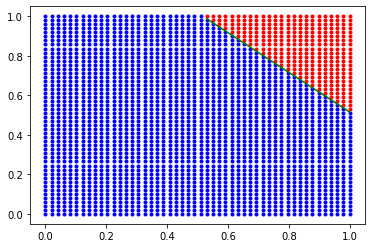

In [286]:
dataset_and_x = ((0,0), (0,1), (1,0), (1,1))
dataset_and_y = (0, 0, 0, 1)
do_gate(dataset_and_x, dataset_and_y)


#### XOR gate

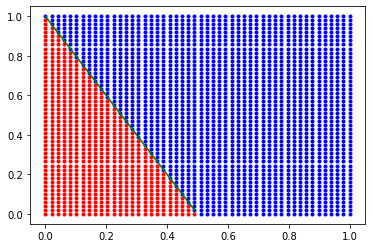

In [287]:
dataset_xor_x = ((0,0), (0,1), (1,0), (1,1))
dataset_xor_y = (0, 1, 1, 0)

do_gate(dataset_xor_x, dataset_xor_y)

Jak widać wytrenowany neuron poradził sobie dobrze z bramkami or i and ale z xor już nie (dla tego że ona jest nie liniowa?)

# TODO

## Part 4: Multilayer perceptron
More neurons can be stacked together to model nonlinear properties.  

### Task 4.1
In this task you have to implement following ANN:
* Input size: 2
* 1 layer with 2 units with sigmoid activation function
* 1 layer with 1 unit with sigmoid activation function
* Output size: 1
    
Your Neuron class was not designed for ambitious merging of weights and biases during the gradient descent, nor for passing outputs to perform forward propagation. To overcome such inconvenience, please manualy define dataflow and method calling for all Neurons. You can expand provided example.

In [288]:
import numpy as np

def act(x):
    return 1 / (1 + np.e ** (-x))

def d_act(x):
    return act(x) * (1 - act(x))

def cost(y_pred, y_true):
    return (y_true-y_pred)**2

def d_cost(y_pred, y_true):
    return 2 * (y_pred - y_true)

In [289]:
x = np.array([[1,2,3]]).T
w = np.array([[1,2,1],
              [1,1,1]])
b = np.array([[0,0]]).T
z1 = w@x
z = z1 + b
print(z)
print(act(z))
dy = np.array([[0.5,1.2]]).T
dz = d_act(z)
core  = dy*dz
print(core)
dw = core @ x.T
print(dw)
alpha = 1
wn = w - alpha*dw
print(wn)
b = b - core
print(b)
dx = core*w
print(dx)
dy_2 = np.mean(dx,axis=0,keepdims=True).T
print(dy_2)

[[8]
 [6]]
[[0.99966465]
 [0.99752738]]
[[0.00016762]
 [0.00295981]]
[[0.00016762 0.00033524 0.00050286]
 [0.00295981 0.00591962 0.00887943]]
[[0.99983238 1.99966476 0.99949714]
 [0.99704019 0.99408038 0.99112057]]
[[-0.00016762]
 [-0.00295981]]
[[0.00016762 0.00033524 0.00016762]
 [0.00295981 0.00295981 0.00295981]]
[[0.00156371]
 [0.00164752]
 [0.00156371]]


In [290]:
class Layer:
    def __init__(self,
                 layer_size,
                 inp_size,
                 weights_creator,
                 biases_creator,
                 act,
                 d_act,
                 lr = 1):
        self._w = weights_creator(layer_size, inp_size)
        self._b = biases_creator(layer_size)
        self._input_size = inp_size
        self._layer_size = layer_size
        self._act = act
        self._d_act = d_act
        self._z = None
        self._y = None
        self.x = None
        self.lr = lr

    def _forward_prop(self, x):
        assert x.shape == (self._input_size, 1)
        self.x = x
        self._z = self._w @ self.x + self._b
        return self._act(self._z)


    def _backward_prop(self, delta):
        assert delta.shape == (self._layer_size, 1)
        core = delta * self._d_act(self._z)
        dw = core @ self.x.T
        db = core
        dx1 = core*self._w
        dx = np.mean(dx1,axis=0,keepdims=True).T
        self._update_weights_and_biases(dw, db)
        return dx

    def _update_weights_and_biases(self, dw, db):
        self._w -= dw*self.lr
        self._b -= db*self.lr

    def __call__(self, x):
        return self._forward_prop(x)

    def __getitem__(self, deltas):
        return self._backward_prop(deltas)

In [291]:
def create_weights(layer_size, inp_size):
    return np.random.randint(-100,100,(layer_size, inp_size))/100
def create_biases(layer_size):
    return np.zeros((layer_size,1))

In [292]:
l = Layer(2,3,create_weights,create_biases,act,d_act)
l(x)
l[dy]

array([[ 0.03005208],
       [ 0.10744399],
       [-0.04585968]])

In [293]:
from typing import List

class NeuralNetwork:
    def __init__(self, neuron_amount_in_layers: List, **layer_kwargs):
        self._net_size = len(neuron_amount_in_layers) - 1
        self._l_sizes = neuron_amount_in_layers
        self._net = [Layer(self._l_sizes[nr+1],
                          self._l_sizes[nr],
                          **layer_kwargs) for nr in range(0, self._net_size)]

    def _network_forward_propagation(self, x: np.array) -> float:
        for layer in self._net:
            x = layer(x)
        return x

    def _network_backwards_propagation(self, deltas) -> None:
        for layer in reversed(self._net):
            deltas = layer[deltas]
        return deltas

    def _process_input(self, x: np.array or List or Tuple, size):
        if isinstance(x, (list,tuple)):
            assert len(x) == size
            x = np.array(x)
        return x.reshape((size, 1))

    def __call__(self, x):
        x = self._process_input(x, self._l_sizes[0])
        return self._network_forward_propagation(x)

    def __getitem__(self, deltas):
        deltas = self._process_input(deltas, self._l_sizes[-1])
        return self._network_backwards_propagation(deltas)

In [294]:
nn = NeuralNetwork([3,5,6,7,2,2],
                   weights_creator=create_weights,
                   biases_creator=create_biases,
                   act=act,
                   d_act=d_act)
nn(x)
nn[dy]



array([[-8.21758678e-07],
       [-6.14938226e-07],
       [ 1.11883234e-07]])

### Task 4.2
1. Train your ANN created in task 4.1 on the XOR dataset
2) Visualize the dataset and ANN's result (a regression line, as function of two inputs).
3) Comment results

[[0]] [[0.01797334]]
[[1]] [[0.98086047]]
[[1]] [[0.98077789]]
[[0]] [[0.02388814]]


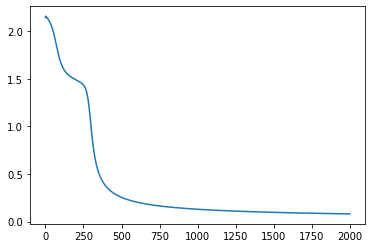

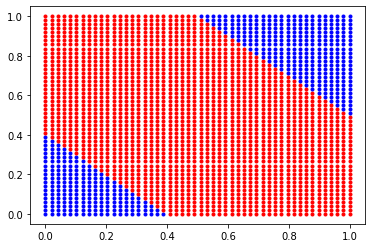

In [296]:
dataset_xor_x = ((0,0), (0,1), (1,0), (1,1))
dataset_xor_y = ([0], [1], [1], [0])

nn = NeuralNetwork([2,2,1],
                   weights_creator=create_weights,
                   biases_creator=create_biases,
                   act=act,
                   d_act=d_act,
                   lr=1)

ds = []
for i in range(2001):
    d = 0
    for j in range(4):
        x = dataset_xor_x[j]
        t_y = [dataset_xor_y[j]]
        p_y = nn(x)
        dy = t_y - p_y
        delta = nn[-2*dy]
        d+=abs(dy)
        if i == 2000:
            print(t_y, p_y)
    ds.append(d[0][0])
plt.figure()
plt.plot(ds)
plt.show()
 # print(d)
xs = np.linspace(0,1,50)
plt.figure()
for x0 in xs:
    for x1 in xs:
        x = np.array([x0,x1]).T
        res = nn(x)
        col = 'r' if res>0.5 else 'b'
        plt.plot(x0,x1,f"{col}.")
plt.show()

- Tym razem sieć zadziałała - tylko czy potrzeba było aż tak intensywnego uczenia?
- czasem jak się jakieś wagi wylosują to nie udaje się zakończyć poprawnie
- zależnie od próby różnie klasyfikuje "środek" wykresu

## Remarks
* **Do not implement ANN by yourself** - use already tested open-source frameworks with hardware acceleration, such as PyTorch, Keras, TensorFlow, Jax+Haiku, etc.
* **Every ANN is just an aproximator for a certain (often unknown) function** - Nothing more, nothing less. The learning procedure is data-based brutal force function derivation.
* **Despite current knowledge, selecting ANN dimensions is still more art than science** - every fixed parameter can be considered as "hyperparameter", which can be further optimized by an adequate algorithm.
* **Selecting an activation function is not trival** - always consider dimishing gradient and caluclation cost

## Further reading
* https://brilliant.org/wiki/perceptron/
* https://towardsdatascience.com/how-does-back-propagation-in-artificial-neural-networks-work-c7cad873ea7
* https://www.edureka.co/blog/backpropagation/


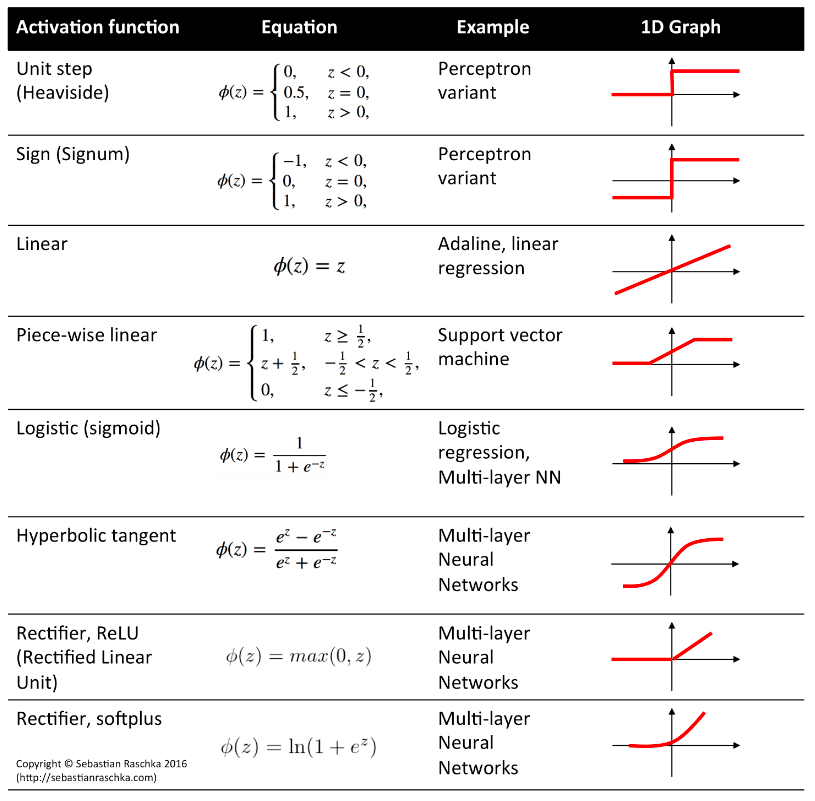


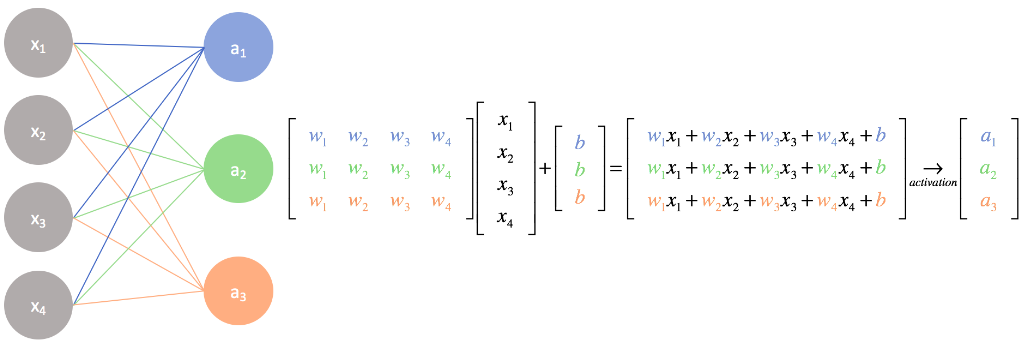